# **Assignment 1**

# Srujana Vanka - 2020102005

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing librabies
import numpy as np
import pandas as pd 
import cv2
import matplotlib.pyplot as plt
import os
from google.colab import drive
%matplotlib inline
from IPython.display import Image
from google.colab.patches import cv2_imshow 
import math

In [ ]:
%cd /content/drive/MyDrive/images/
%ls

# Question 5

### Part 1

### 5.1 - Part a
Gamma transform can be used to control the overall brightness of an image. It can be used with images that are found to be either bleached out or too dark. 

Power law transform is given by $s~=~c~r^\gamma$. $\gamma$ can take any values between **$0$ to $\infty$**.

Here, $\gamma$ and $c$ are just positive constants. 

### 5.1 - Part b
When $\gamma = 1$, the equation will return an intensity value within the $8$-bit range. This is not possible for $c=1$.
When $\gamma = 1$, we must normalise the image to get the transformed pixel intensity within the $8$-bit range. We must then scale it back to $[0,255]$.

The equation is of the form: 

$$s~=~ 255*(\frac{r}{255})^\gamma$$

### 5.1 - Part c
Power law curves with $\gamma$ < 1, map a narrow range or dark input values into as wider range of output values. Similarly, for $\gamma$ > 1, the opposite is true. 

Hence, for $\gamma$ < 1, the output images are much brighter than intended. 
Similarly, for $\gamma$ > 1, the output images are much darker than intented. 

The plot for the gamma function is as follows:


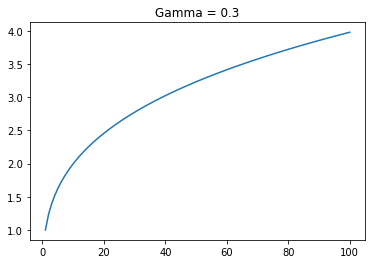

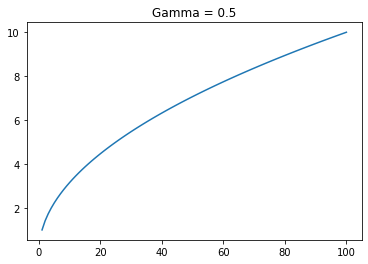

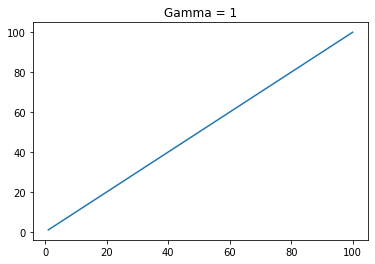

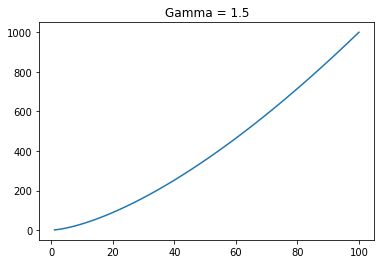

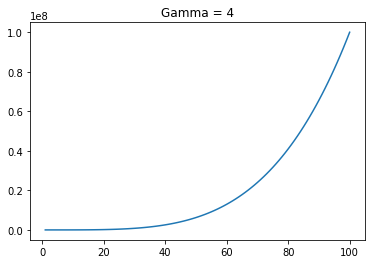

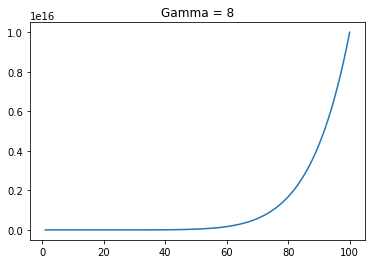

In [ ]:
r = np.linspace(1, 100, 100)

for g in [0.3,0.5,1,1.5,4,8]:
    s = r**g 
    plt.figure()
    plt.title("Gamma = {}".format(g))
    plt.plot(r, s)

(-0.5, 229.5, 218.5, -0.5)

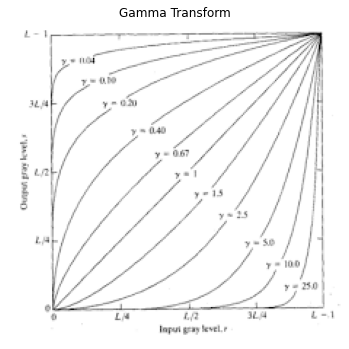

In [ ]:
image = cv2.imread('download.png')
cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.figure(figsize = (6,6))
plt.imshow(image, cmap='gray')
plt.title("Gamma Transform")
plt.axis('off')


### Part 2

In [ ]:
# Takes in an image im and the value of gamma and returns the transformed image
def powerLawTransform(im,gamma):
  im=im.copy()

  # Extract the heights and width of the image
  h,w = im.shape
  im=np.array(255*((im/255)**gamma))
  im=im.astype(np.uint8)
  return im

### Part 3

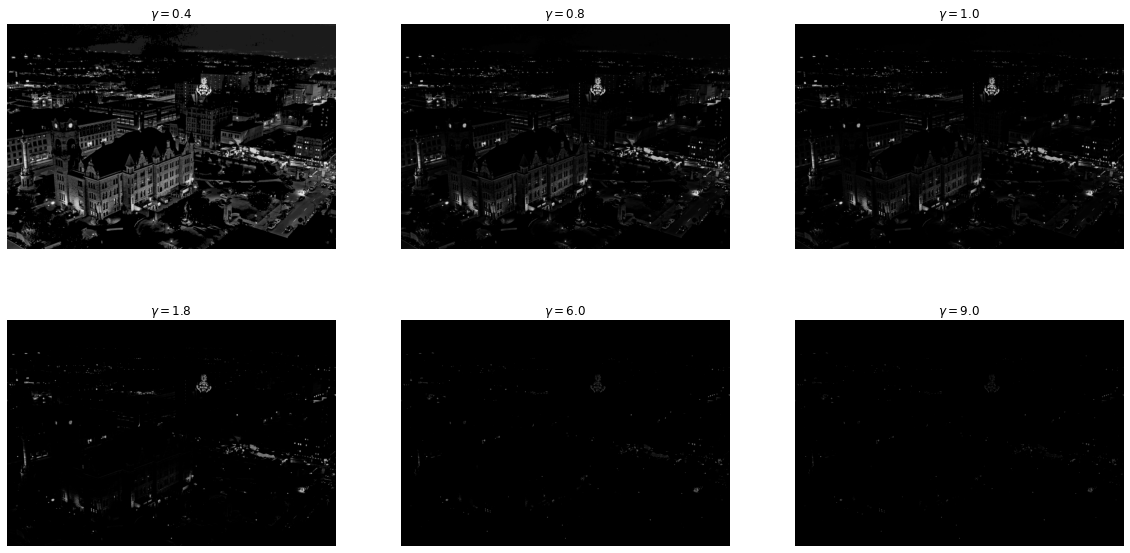

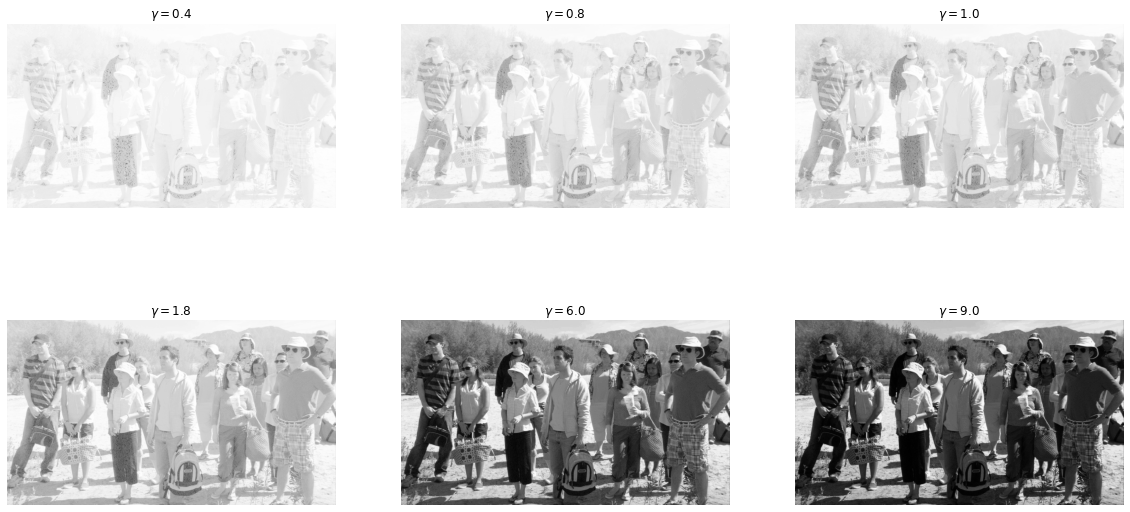

In [ ]:
scranton = cv2.imread('scrantonAreal.png')
trip = cv2.imread('tripGrpPhoto.png')

# Converting to grayscale
scranton = cv2.cvtColor(scranton, cv2.COLOR_BGR2GRAY)
trip = cv2.cvtColor(trip, cv2.COLOR_BGR2GRAY)
imgs = [scranton, trip]
g = [0.4, 0.8, 1.0, 1.8, 6.0, 9.0]
for im in imgs:
    plt.figure(figsize = (20,10))
    for j in range(1,7):
        plt.subplot(2,3,j)
        output = powerLawTransform(im, g[j-1])
        plt.imshow(output, cmap='gray')
        plt.title('$\gamma = ${}'.format(g[j-1]))
        plt.axis('off')
    plt.show() 

We observe that the images are darker than intended for $\gamma \gt 1$ and the opposite for $\gamma \lt 1$.

scrantonArea1.png is already a dark image and hence, it is enhanced by applying a $\gamma \lt 1$. In the same way, tripGrpPhoto.png is already a bright image and hence we apply a $\gamma \gt 1$ to enhance it.

## Part 4

### 4a - Log Transformation
Similar to power law transform, in log transformation, each variable x is replaced with , where the base of the log is left up to the analyst. 
It is given by: 
$$s = clog(1+r)$$ 
where,
c is a constant, usually c = 1, and r ≥ 0, r is the range of input image.pixels, usually [0, 255]

This maps a narrow range of low intensity values in the input into a wider range of output levels. The opposite is true for higher values of input levels.

### 4b


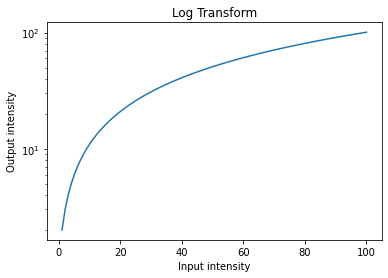

In [ ]:
r = np.linspace(1, 100, 100)
s = (1 + r)  # Taking c as  1

plt.yscale('log') 
plt.title("Log Transform")
plt.xlabel("Input intensity")
plt.ylabel("Output intensity")
plt.plot(r, s)


### 4c

In [ ]:
# Log transformation 
# clog(1+r)
def LogTransform(im):
   c = 255 / np.log(1 + np.max(im))
   im = c * (np.log(im + 1))
   im = np.array(im, dtype = np.uint8)
   return im


### 4d

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


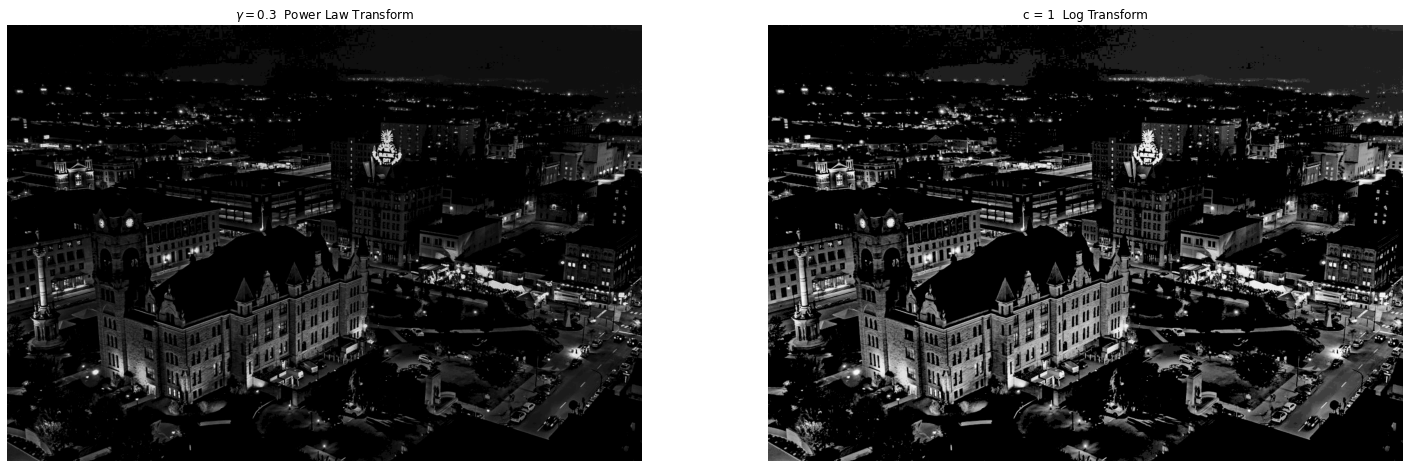

In [ ]:
scranton = cv2.imread('scrantonAreal.png')
# Converting to grayscale
scranton = cv2.cvtColor(scranton, cv2.COLOR_BGR2GRAY)

plt.figure(figsize = (25,15))
# Power Law Transform
plt.subplot(121)
plt.imshow(powerLawTransform(scranton, 0.5), cmap='gray')
plt.title("$\gamma = $"+ str(0.3)+"  Power Law Transform")
plt.axis('off')

# LOg Transform 
plt.subplot(122)
plt.imshow(LogTransform(scranton), cmap='gray')
plt.title("c = "+ str(1)+"  Log Transform")
plt.axis('off')
plt.show() 

### From above, we can see that the image is a little blurry compared to power law transform output.